# Market Analysis of Small Businesses in Toronto

## Introduction

Small business startups are a risky venture. Before small business owners can receive a capital infusion, they need to demonstrate the viability of the venture. The investor, whether a bank or a venture capitalist, will need some measure of confidence that the investment will yield returns. The small business sector is notoriously volatile, with many businesses failing in the first few years. Is there a way in which to measure the likelihood that a business will succeed? This is the question that this report will address. 

## Business Problem

A key factor in the success of a small business is location. One type of business may fail in one area and succeed in another. This success hinges partly on whether the product being offered matches the consumption patterns of the residents in the area. This report tackles this problem by analyzing consumption patterns in different neighborhoods around Toronto and identifying opportunities to fill market gaps. 

This report is targeted at parties who are interested in the viability of small businesses in the Toronto area. A few possible recipients of this report are loan officers at lending institutions, analysis working for venture capital, city planners, and consultants. 

## Data

### Loading Data

First import required packages.

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

Gather neighborhood data from wikipedia.

In [2]:
res = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))

In [3]:
df = df[0]
df.head()

,Postal code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


Clean data.

In [4]:
df.columns = ['PostalCode','Borough','Neighborhood']
df['Neighborhood'] = df['Neighborhood'].str.replace('/',',')
df = df.loc[df['Borough'] != 'Not assigned']
df.head()

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park , Harbourfront"
5,M6A,North York,"Lawrence Manor , Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government"


Load coordinates from csv. (This is a hidden cell since it includes credentials.)

In [5]:
# The code was removed by Watson Studio for sharing.

In [6]:
df_coords.columns = ['PostalCode','Latitude','Longitude']
df_coords.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Merge coordinates with neighborhoods.

In [7]:
df_merged = pd.merge(df, df_coords, how='inner', on='PostalCode')
df_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494


Import more packages.

In [8]:
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium 
print("Import Complete!")

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                       

Map of Toronto:

In [9]:
neighborhoods = df_merged

# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[43.692190, -79.347015], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Loading Venue Data

In [10]:
# The code was removed by Watson Studio for sharing.

In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
downtown_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park , Harbourfront
Lawrence Manor , Lawrence Heights
Queen's Park , Ontario Provincial Government
Islington Avenue
Malvern , Rouge
Don Mills
Parkview Hill , Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park , Princess Gardens , Martin Grove , Islington , Cloverdale
Rouge Hill , Port Union , Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate , Bloordale Gardens , Old Burnhamthorpe , Markland Wood
Guildwood , Morningside , West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor , Wilson Heights , Downsview North
Thorncliffe Park
Richmond , Adelaide , King
Dufferin , Dovercourt Village
Scarborough Village
Fairview , Henry Farm , Oriole
Northwood Park , York University
East Toronto
Harbourfront East , Union Station , Toronto Islands
Little Portugal , Trinity
Kennedy Park , Ionview , East Birchmount Park
Bayview Village
Do

In [13]:
downtown_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,5,5,5,5,5,5
"Alderwood , Long Branch",10,10,10,10,10,10
"Bathurst Manor , Wilson Heights , Downsview North",20,20,20,20,20,20
Bayview Village,4,4,4,4,4,4
"Bedford Park , Lawrence Manor East",24,24,24,24,24,24
Berczy Park,56,56,56,56,56,56
"Birch Cliff , Cliffside West",4,4,4,4,4,4
"Brockton , Parkdale Village , Exhibition Place",23,23,23,23,23,23
Business reply mail Processing CentrE,18,18,18,18,18,18


In [14]:
# one hot encoding
toronto_onehot = pd.get_dummies(downtown_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = downtown_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

In [15]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.set_index('Neighborhood')
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,Agincourt,0.000000,0.0,0.000000,0.000000,0.0000,0.0000,0.000,0.0000,0.000,...,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,"Alderwood , Long Branch",0.000000,0.0,0.000000,0.000000,0.0000,0.0000,0.000,0.0000,0.000,...,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,"Bathurst Manor , Wilson Heights , Downsview North",0.000000,0.0,0.000000,0.000000,0.0000,0.0000,0.000,0.0000,0.000,...,0.00000,0.00,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.0,0.000000
3,Bayview Village,0.000000,0.0,0.000000,0.000000,0.0000,0.0000,0.000,0.0000,0.000,...,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,"Bedford Park , Lawrence Manor East",0.000000,0.0,0.000000,0.000000,0.0000,0.0000,0.000,0.0000,0.000,...,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,Berczy Park,0.000000,0.0,0.000000,0.000000,0.0000,0.0000,0.000,0.0000,0.000,...,0.00000,0.00,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
6,"Birch Cliff , Cliffside West",0.000000,0.0,0.000000,0.000000,0.0000,0.0000,0.000,0.0000,0.000,...,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7,"Brockton , Parkdale Village , Exhibition Place",0.043478,0.0,0.000000,0.000000,0.0000,0.0000,0.000,0.0000,0.000,...,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,Business reply mail Processing CentrE,0.055556,0.0,0.000000,0.000000,0.0000,0.0000,0.000,0.0000,0.000,...,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,"CN Tower , King and Spadina , Railway Lands , ...",0.000000,0.0,0.000000,0.062500,0.0625,0.0625,0.125,0.1875,0.125,...,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


Some functions for plotting neighborhood venues

In [16]:
def venuePlot(neighborhood):
    val = neighborhood.values[0]
    name = val[0]
    frequ = val[1:]
    categories = neighborhood.columns[1:]
    use_cat = categories[(frequ>0)]
    use_value = frequ[(frequ>0)]
    
    plt.bar(use_cat, use_value, align='center', alpha=0.5)
    plt.xticks(use_cat, rotation='vertical')
    plt.ylabel('frequency')
    plt.title(name+' Venues')

    plt.show()
    

In [17]:
def nPlot(name):
    neighborhood = toronto_grouped[toronto_grouped['Neighborhood']==name]
    venuePlot(neighborhood)

Data exploration

In [18]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

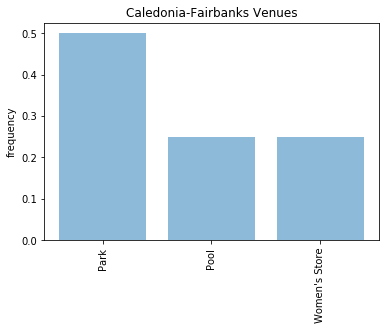

In [19]:
nPlot('Caledonia-Fairbanks')

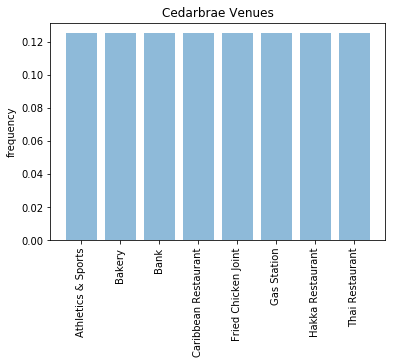

In [20]:
nPlot('Cedarbrae')

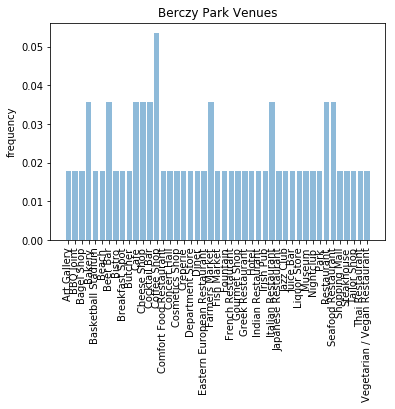

In [21]:
nPlot('Berczy Park')

Functions for k-means analysis

In [22]:
# Function that ranks the elements of a given list

def rankList(l):
    output = [0] * len(l)
    for i, x in enumerate(sorted(range(len(l)), key=lambda y: l[y])):
        output[x] = i
    return(output)

In [23]:
# Funtion that finds the best neighborhoods to start a given type of business
# Finds cluster rankings while leaving out target category then ranks neighborhoods based on 
# target category saturation, combines the two rankings and gives results.

def findBestNeighborhoods(category,num):

    kclusters = num
    
    categoryValues = toronto_grouped[category]
    
    categoryRank = rankList(categoryValues)

    toronto_clustering = toronto_grouped.drop(['Neighborhood',category], 1)

    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit_transform(toronto_clustering)
    
    bestNeighborhoods = []
    
    for i in range(num):
        kRanks = rankList(kmeans[:,i])
        combinedRanks = [sum(x) for x in zip(kRanks, categoryRank)] # Adds the ranks together
        mRank = min(combinedRanks)
        bestIndex = combinedRanks.index(mRank)
        bestNeighborhoods.append(toronto_grouped['Neighborhood'][bestIndex])
        
    return bestNeighborhoods

In [24]:
def plotBest(bestSpots):
    bMap = folium.Map(location=[43.692190, -79.347015], zoom_start=11)

    for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
        label = '{}, {}'.format(neighborhood, borough)
        label = folium.Popup(label, parse_html=True)
        if neighborhood not in bestSpots:
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='blue',
                fill=True,
                fill_color='#3186cc',
                fill_opacity=0.7,
                parse_html=False).add_to(bMap)  
        else:
             folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='red',
                fill=True,
                fill_color='#eb5b5b',
                fill_opacity=0.7,
                parse_html=False).add_to(bMap)           

    display(bMap)

In [25]:
from sklearn.cluster import KMeans

Now we can find the best neighborhoods for different types of businesses.

In [26]:
bestCoffee = findBestNeighborhoods("Coffee Shop", 4)
bestCoffee

['Caledonia-Fairbanks',
 'CN Tower , King and Spadina , Railway Lands , Harbourfront West , Bathurst  Quay , South Niagara , Island airport',
 'Business reply mail Processing CentrE',
 'Hillcrest Village']

In [27]:
plotBest(bestCoffee)

In [28]:
bestBagel = findBestNeighborhoods("Bagel Shop", 4)
bestBagel

['Church and Wellesley',
 'Brockton , Parkdale Village , Exhibition Place',
 'Brockton , Parkdale Village , Exhibition Place',
 'Caledonia-Fairbanks']

In [29]:
plotBest(bestBagel)

In [30]:
bestNight = findBestNeighborhoods("Nightclub", 4)
bestNight

['Church and Wellesley',
 'Davisville North',
 'CN Tower , King and Spadina , Railway Lands , Harbourfront West , Bathurst  Quay , South Niagara , Island airport',
 'Caledonia-Fairbanks']

In [31]:
plotBest(bestNight)

In [32]:
bestWomens = findBestNeighborhoods("Women's Store", 4)
bestWomens

['Berczy Park',
 'Berczy Park',
 'Brockton , Parkdale Village , Exhibition Place',
 'Business reply mail Processing CentrE']

In [413]:
plotBest(bestWomens)

In [425]:
bestThai = findBestNeighborhoods("Thai Restaurant", 4)
bestThai

['Bathurst Manor , Wilson Heights , Downsview North',
 'Brockton , Parkdale Village , Exhibition Place',
 'Brockton , Parkdale Village , Exhibition Place',
 'Caledonia-Fairbanks']

In [426]:
plotBest(bestThai)